# Homework 4

### Imports

In [38]:
from tensorflow.keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data load

In [22]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [23]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Normalization

In [24]:
X_train = X_train.astype("float") / 255.0
X_test = X_test.astype("float") / 255.0

### Labeling categorical

In [26]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Model training

In [30]:
model = keras.Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.1))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.1))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))

# a softmax classifier
model.add(layers.Dense(10, activation='softmax'))

d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs=35, batch_size=32)

Epoch 1/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.2146 - loss: 2.1088
Epoch 2/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.4009 - loss: 1.6573
Epoch 3/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4674 - loss: 1.4752
Epoch 4/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5184 - loss: 1.3443
Epoch 5/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5564 - loss: 1.2509
Epoch 6/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.5887 - loss: 1.1661
Epoch 7/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6136 - loss: 1.0909
Epoch 8/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6402 - loss: 1.0134
Epoch 9/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6648 - loss: 0.9615
Epoch 10/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6809 - loss: 0.9081
Epoch 11/35
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6970 - loss: 0.8596
Epoch 12

In [34]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.

pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7565 - loss: 0.9613
Test loss: 0.9733807444572449
Test accuracy: 0.7541999816894531
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [40]:
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

print(classification_report(Y_pred_classes, Y_true))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       968
           1       0.85      0.87      0.86       971
           2       0.62      0.74      0.68       841
           3       0.60      0.55      0.57      1098
           4       0.74      0.71      0.73      1046
           5       0.66      0.65      0.66      1008
           6       0.82      0.81      0.81      1014
           7       0.76      0.85      0.80       892
           8       0.86      0.84      0.85      1022
           9       0.87      0.76      0.81      1140

    accuracy                           0.75     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.76      0.75      0.75     10000



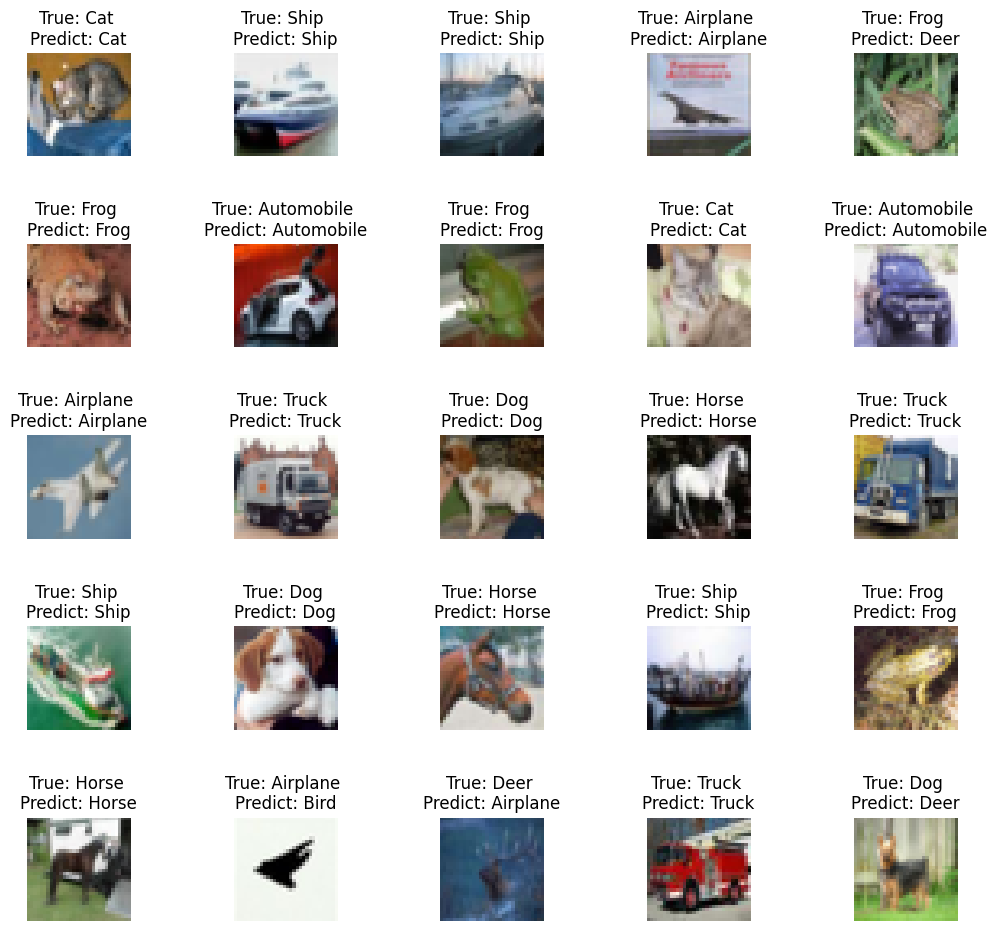

In [42]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)